<a href="https://colab.research.google.com/github/resulpusat/SayisalGoruntuIslemeFinal_234309024/blob/main/sayisalgoruntuislemefinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# İlgili Kütüphaneler İçeri Aktarılmıştır
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from skimage import exposure
from scipy.ndimage import zoom

In [ ]:
import pandas as pd

# Veri Google Drive'dan yüklenmiştir
train_df = pd.read_csv('/content/drive/MyDrive/AI-for-Medicine-Specialization-master/AI-for-Medical-Diagnosis/nih/train-small.csv')


print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()


There are 1000 rows and 16 columns in this data frame


Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0             0  
1      29855                   0          0             0  
2       1297                   1          0             0  
3      12359                   0          0             0  
4      17951                   0          0             0

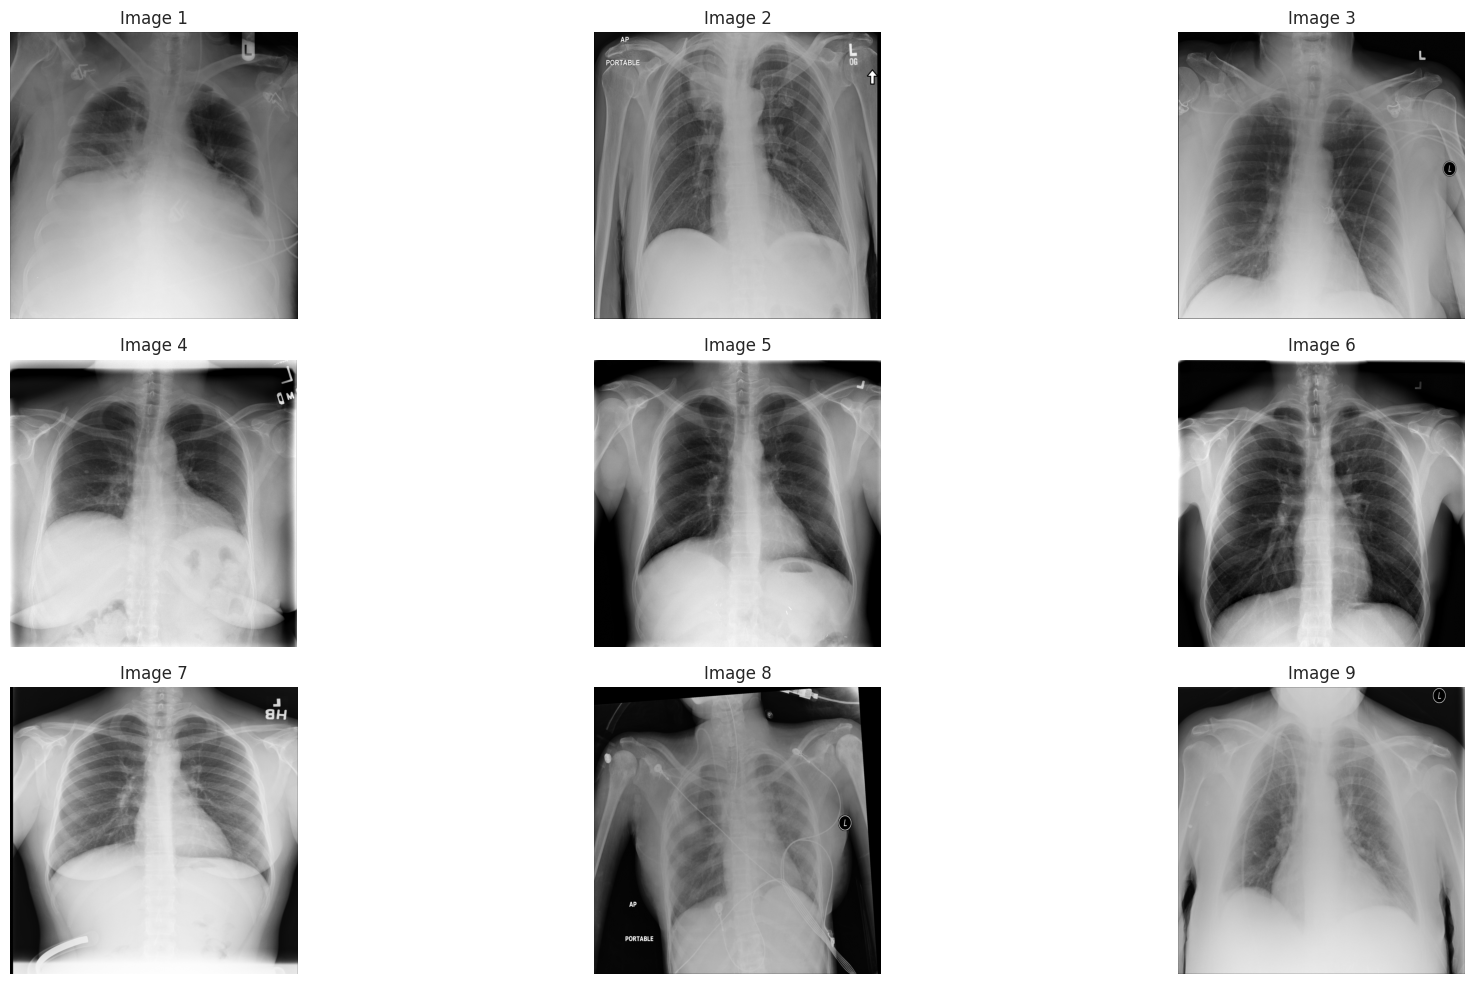

In [ ]:
# Görüntülerin bulunduğu dizin
img_dir = 'nih/images_small/'

# Random_images listesi, veri setinden rastgele 9 görüntü seçer.
random_images = [np.random.choice(train_df['Image'].values) for i in range(9)]

# Görselleştirme
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'Image {i+1}')

plt.tight_layout()
plt.show()

İstatistikler: Her bir görüntü için minimum, maksimum, ortalama ve standart sapma değerleri hesaplanır ve yazdırılır.

In [ ]:
# Rastgele seçilmiş 9 görüntünün İstatistiksel Özelliklerinin Hesaplanması
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    print(f"Image {i+1}:")
    print(f"  Min: {img.min():.4f}, Max: {img.max():.4f}, Mean: {img.mean():.4f}, Std: {img.std():.4f}")

Image 1:
  Min: 0.0000, Max: 0.8784, Mean: 0.4635, Std: 0.1984
Image 2:
  Min: 0.0000, Max: 1.0000, Mean: 0.5086, Std: 0.1849
Image 3:
  Min: 0.0000, Max: 1.0000, Mean: 0.4864, Std: 0.2169
Image 4:
  Min: 0.0000, Max: 1.0000, Mean: 0.5871, Std: 0.2664
Image 5:
  Min: 0.0000, Max: 0.9882, Mean: 0.4667, Std: 0.2636
Image 6:
  Min: 0.0000, Max: 1.0000, Mean: 0.3904, Std: 0.2676
Image 7:
  Min: 0.0000, Max: 0.9765, Mean: 0.6037, Std: 0.2654
Image 8:
  Min: 0.0000, Max: 1.0000, Mean: 0.3743, Std: 0.2410
Image 9:
  Min: 0.0000, Max: 1.0000, Mean: 0.6092, Std: 0.2059


**Histogram: Her bir görüntünün piksel yoğunluklarının histogramı çizdirilir. Bu, görüntünün kontrast ve parlaklık dağılımını anlamaya yardımcı olur.**

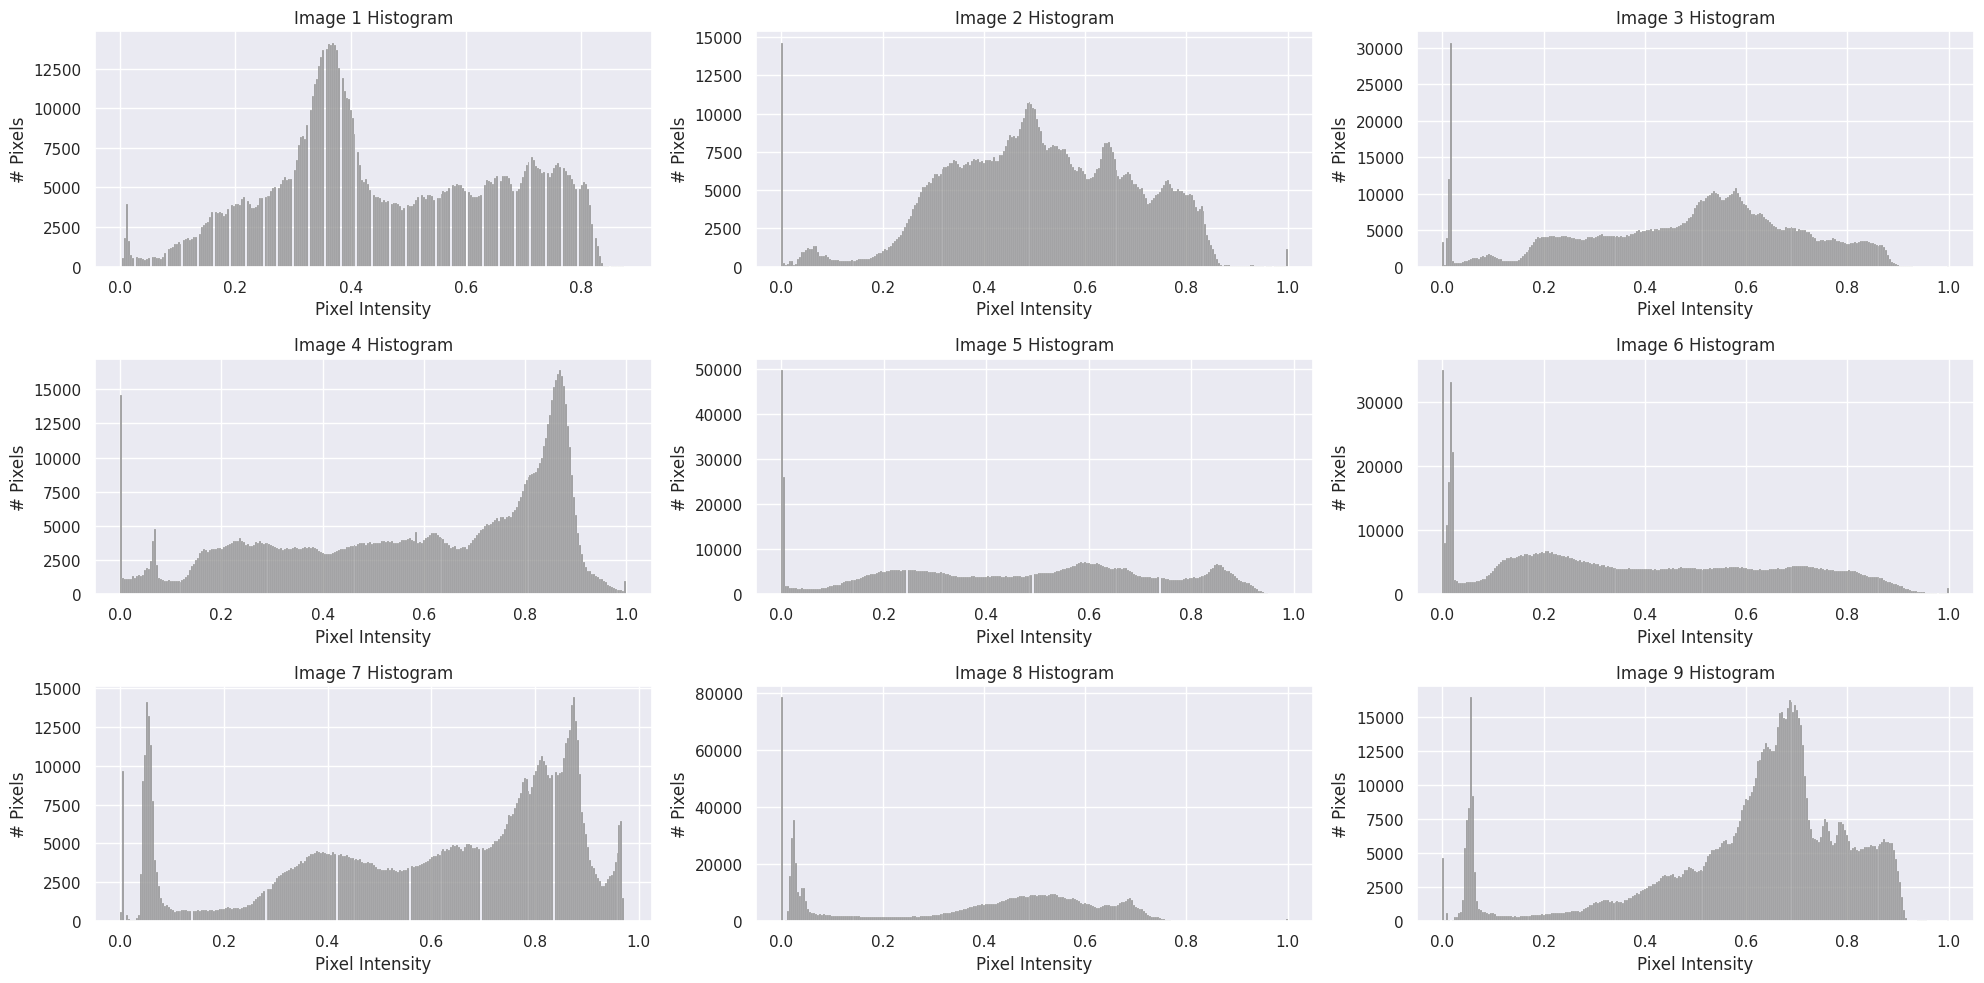

In [ ]:
# Rastgele Seçilmiş 9 Görüntünün Histogramınlarının Çizdirilmesi
plt.figure(figsize=(20, 10))
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    plt.subplot(3, 3, i + 1)
    sns.histplot(img.ravel(), bins=256, color='gray', kde=False)
    plt.title(f'Image {i+1} Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('# Pixels')

plt.tight_layout()
plt.show()

3.Soru

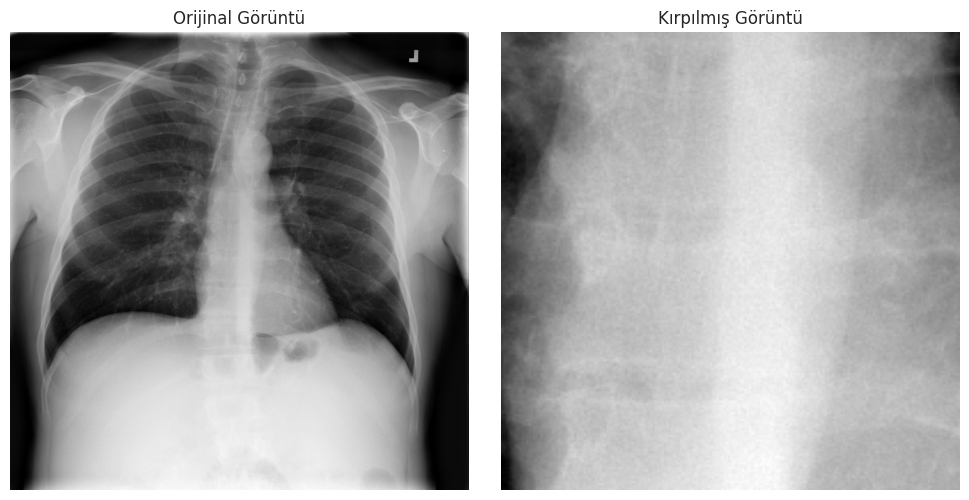

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Görüntüyü yükle
img_dir = 'nih/images_small/'
sample_img = train_df['Image'].values[0]  # İlk görüntüyü örnek olarak al
img = plt.imread(os.path.join(img_dir, sample_img))

# Görüntüyü kırpma (Crop)
# Örnek olarak görüntünün ortasından 200x200 boyutunda bir bölge kırpılmıştır
height, width = img.shape
crop_size = 200  # Kırpma boyutu
start_x = (width - crop_size) // 2
start_y = (height - crop_size) // 2
cropped_img = img[start_y:start_y + crop_size, start_x:start_x + crop_size]

# Orijinal ve kırpılmış görüntüleri görselleştirme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_img, cmap='gray')
plt.title('Kırpılmış Görüntü')
plt.axis('off')

plt.tight_layout()
plt.show()

**Kontrast Germe: Görüntünün kontrastı, 2. ve 98. percentil değerlerine göre ayarlanır.**

**Histogram Eşitleme: Görüntünün histogramı eşitlenerek kontrast artırılır.**

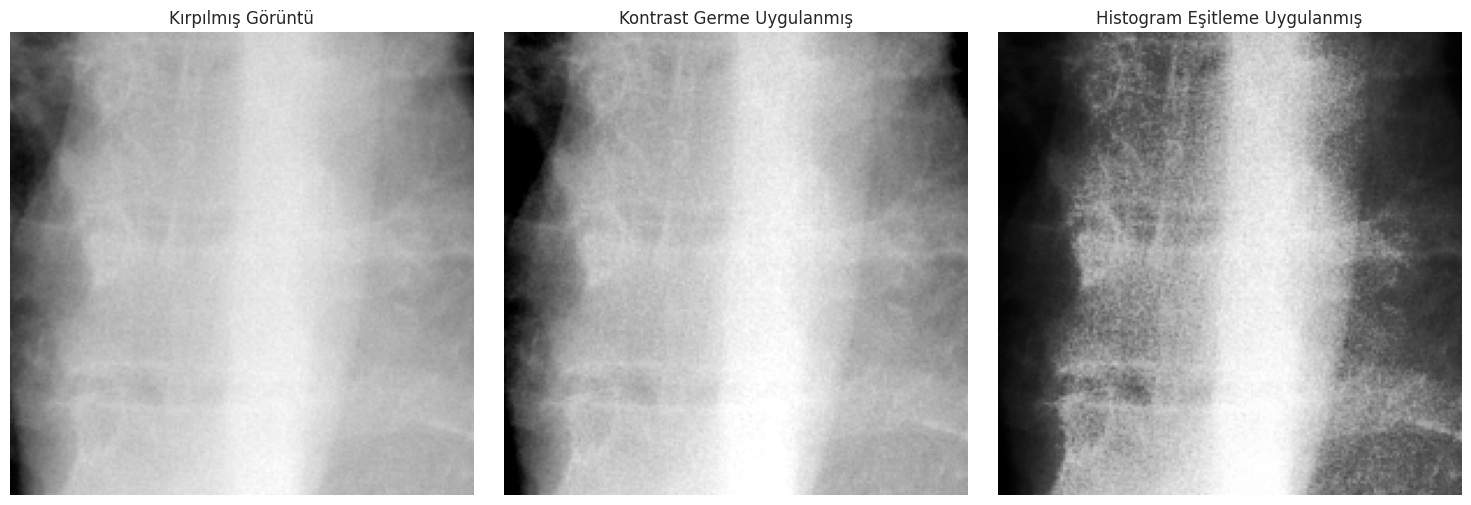

In [ ]:
from skimage import exposure

# Kontrast Germe (Contrast Stretching)
p2, p98 = np.percentile(cropped_img, (2, 98))  # 2. ve 98. percentilleri kullan
contrast_stretched = exposure.rescale_intensity(cropped_img, in_range=(p2, p98))

# Histogram Eşitleme (Histogram Equalization)
equalized_img = exposure.equalize_hist(cropped_img)

# Görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(cropped_img, cmap='gray')
plt.title('Kırpılmış Görüntü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Kontrast Germe Uygulanmış')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Eşitleme Uygulanmış')
plt.axis('off')

plt.tight_layout()
plt.show()

**Median Blur: Görüntüdeki gürültüyü azaltmak için medyan filtresi uygulanır.**

**Gaussian Blur: Görüntüyü yumuşatmak için Gauss filtresi uygulanır**.

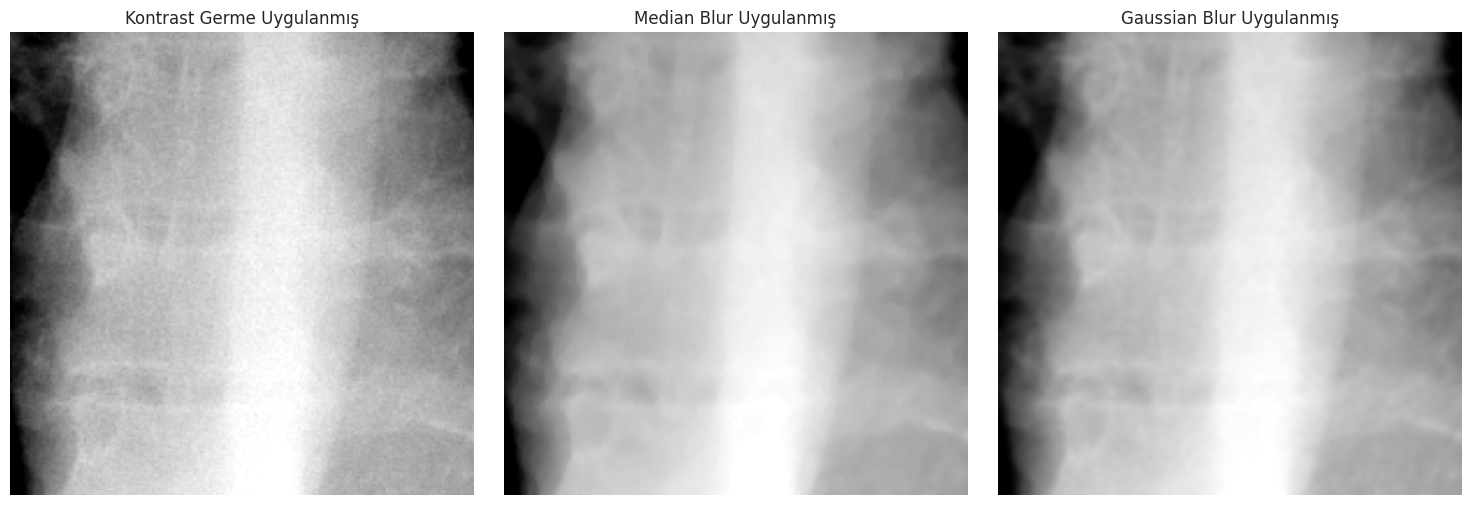

In [ ]:
# Median Blur Uygulama
median_filtered = cv2.medianBlur((contrast_stretched * 255).astype(np.uint8), 5)

# Gaussian Blur Uygulama
gaussian_filtered = cv2.GaussianBlur((contrast_stretched * 255).astype(np.uint8), (5, 5), 0)

# Görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Kontrast Germe Uygulanmış')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Blur Uygulanmış')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Blur Uygulanmış')
plt.axis('off')

plt.tight_layout()
plt.show()

**Gauss Dönüşümü: Görüntüye Gauss dönüşümü uygulanır. Bu, görüntünün yoğunluk dağılımını değiştirir.**

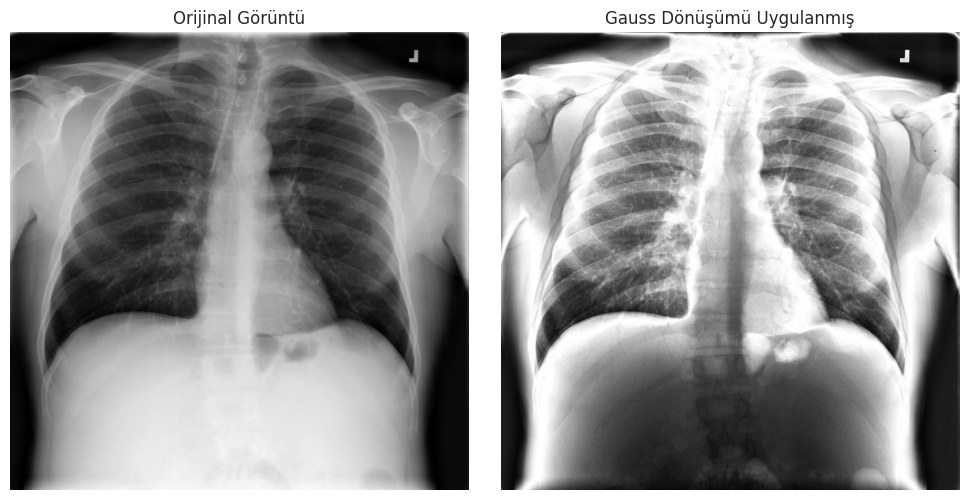

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Örnek görüntüyü yükle
img_dir = 'nih/images_small/'
sample_img = train_df['Image'].values[0]  # İlk görüntüyü örnek olarak al
img = plt.imread(os.path.join(img_dir, sample_img))

# Gauss yoğunluk dönüşümü uygula
def gaussian_transform(image, mean, sigma):
    return np.exp(-((image - mean) ** 2) / (2 * sigma ** 2))

# Ortalama ve standart sapma değerlerini belirle
mean = np.mean(img)
sigma = np.std(img)

# Gauss dönüşümünü uygula
gauss_transformed = gaussian_transform(img, mean, sigma)

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gauss_transformed, cmap='gray')
plt.title('Gauss Dönüşümü Uygulanmış')
plt.axis('off')

plt.tight_layout()
plt.show()

Döngü: thresholds listesi üzerinden geçerek her eşik değeri için bölgeyi belirler.
İlk eşik değeri (i == 0): Bu durumda, piksellerin değeri thresholds[0]'dan küçükse regions matrisine 0 değeri atanır.
Orta eşik değerleri (1 <= i <= len(thresholds)-1): Bu durumda, piksellerin değeri bir önceki eşik ile mevcut eşik arasında olanlar belirlenir.
Son eşik değeri (i == len(thresholds)): Bu durumda, piksellerin değeri en son eşik değerinden büyükse bu bölgeye atanır.

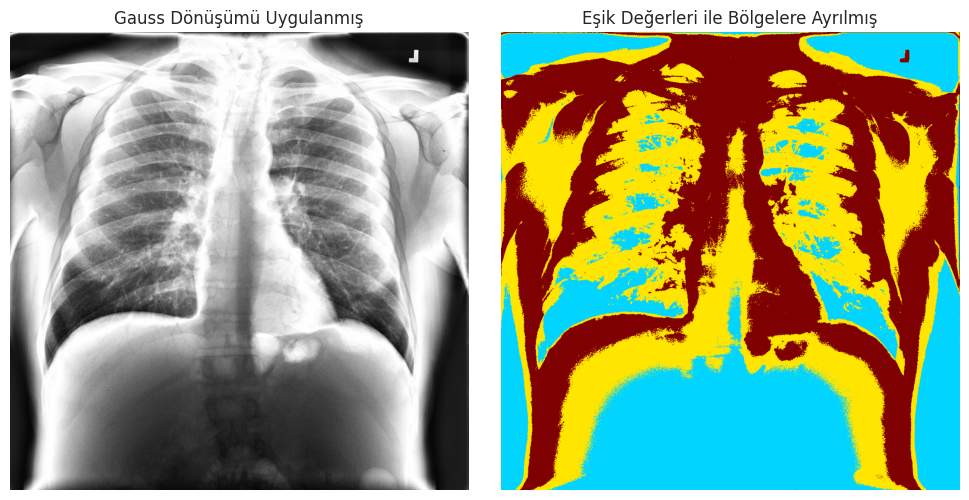

In [ ]:
# Eşik değerlerini belirle
thresholds = [0.2, 0.5, 0.8]  # Örnek eşik değerleri

# Görüntüyü eşik değerlerine göre bölgelere ayır
def apply_thresholds(image, thresholds):
    regions = np.zeros_like(image)
    for i in range(len(thresholds) + 1):
        if i == 0:
            regions[image < thresholds[i]] = i
        elif i == len(thresholds):
            regions[image >= thresholds[i-1]] = i
        else:
            regions[(image >= thresholds[i-1]) & (image < thresholds[i])] = i
    return regions

# Eşik değerlerini uygula
thresholded_regions = apply_thresholds(gauss_transformed, thresholds)

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gauss_transformed, cmap='gray')
plt.title('Gauss Dönüşümü Uygulanmış')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_regions, cmap='jet')
plt.title('Eşik Değerleri ile Bölgelere Ayrılmış')
plt.axis('off')

plt.tight_layout()
plt.show()

Aşağıdaki kodda;<br>
**thresholded_regions.shape[0]: Görüntünün yüksekliği** <br>
**thresholded_regions.shape[1]: Görüntünün genişliği**

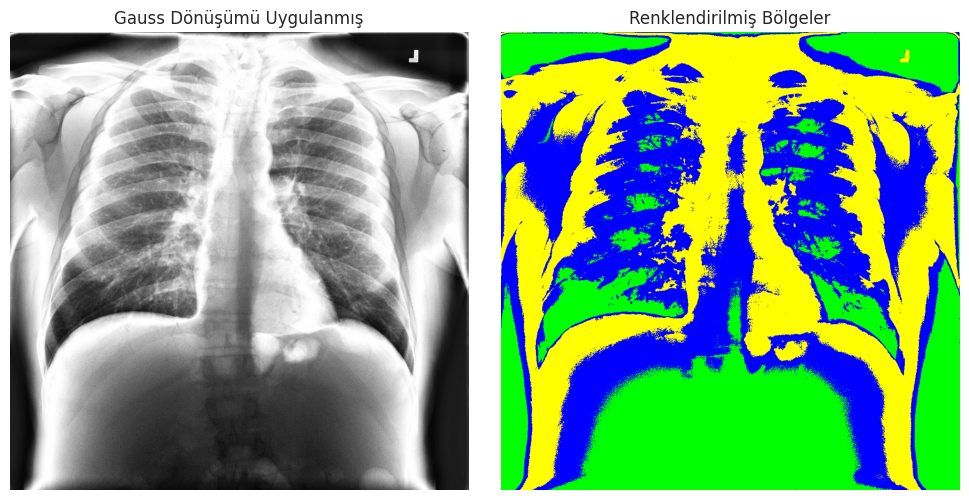

In [ ]:
# Bölgeleri renklendir
colored_regions = np.zeros((thresholded_regions.shape[0], thresholded_regions.shape[1], 3))
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0)]  # Kırmızı, Yeşil, Mavi, Sarı

for i in range(len(thresholds) + 1):
    colored_regions[thresholded_regions == i] = colors[i]

# Görselleştirme
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gauss_transformed, cmap='gray')
plt.title('Gauss Dönüşümü Uygulanmış')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(colored_regions)
plt.title('Renklendirilmiş Bölgeler')
plt.axis('off')

plt.tight_layout()
plt.show()

Aşağıdaki kodda;<br>
Global Thresholding, görüntüyü sabit bir eşik değeriyle ikili (binary) hale getirme işlemidir. Bu örnekte, eşik değeri olarak 127 belirlenmiştir. Görüntüdeki piksellerin değeri 127'den küçükse siyah (0), büyükse beyaz (255) olarak atanır. <br> <br>
Otsu Thresholding, görüntüdeki piksel dağılımını analiz ederek en iyi eşik değerini otomatik olarak belirler. Bu yöntem, histogramın iki sınıfa (arkaplan ve nesne) ayrılması için uygun olan eşik değerini bulmaya çalışır.<br><br><br>
Bir görüntü üzerinde Global Thresholding ve Otsu Thresholding eşikleme yöntemlerini uygular ve sonuçları görsel olarak karşılaştırır. Global Thresholding sabit bir eşik değeri kullanırken, Otsu Thresholding, görüntüdeki en uygun eşik değerini otomatik olarak belirler. Aşağıdaki kodda, her iki yöntemle elde edilen sonuçlar yan yana gösterilir, böylece her iki eşikleme yönteminin karşılaştırılması yapılabilir.

4. Soru

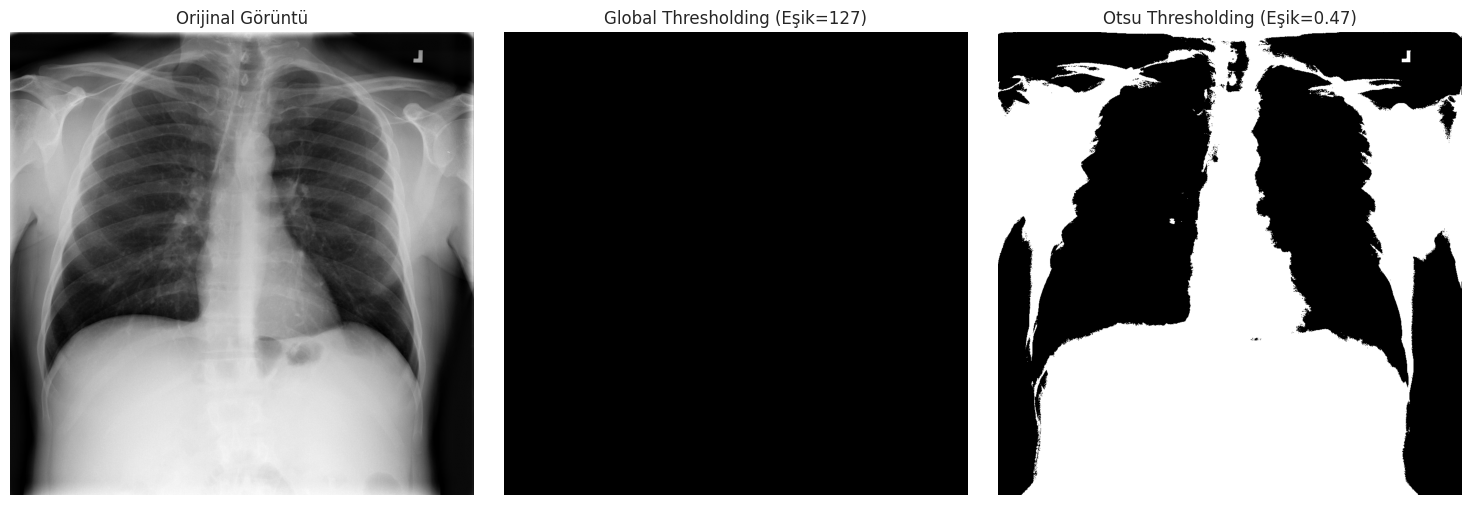

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import try_all_threshold, threshold_otsu, threshold_mean

# Örnek görüntüyü yükle
img_dir = 'nih/images_small/'
sample_img = train_df['Image'].values[0]  # İlk görüntüyü örnek olarak al
img = plt.imread(os.path.join(img_dir, sample_img))

# Görüntüyü gri tonlamalı hale getir (eğer değilse)
if len(img.shape) > 2:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Global Thresholding (Manuel Eşik Değeri)
global_threshold_value = 127  # Örnek eşik değeri
_, global_thresholded = cv2.threshold(img, global_threshold_value, 255, cv2.THRESH_BINARY)

# Otsu Thresholding
otsu_threshold_value = threshold_otsu(img)
_, otsu_thresholded = cv2.threshold(img, otsu_threshold_value, 255, cv2.THRESH_BINARY)

# Görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_thresholded, cmap='gray')
plt.title(f'Global Thresholding (Eşik={global_threshold_value})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_thresholded, cmap='gray')
plt.title(f'Otsu Thresholding (Eşik={otsu_threshold_value:.2f})')
plt.axis('off')

plt.tight_layout()
plt.show()

Aşağıdaki kodda try_all_threshold fonksiyonu, farklı eşikleme yöntemlerinin sonuçlarını fig ve ax değişkenlerinde döndürür. fig grafik figürünü, ax ise eşikleme yöntemlerinin alt grafikleri üzerinde çizim yapılacak eksenleri temsil eder

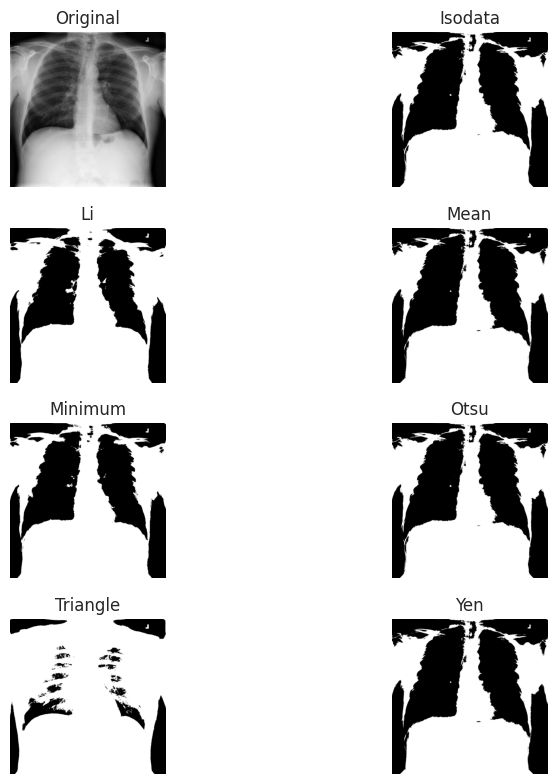

In [ ]:
from skimage.filters import try_all_threshold

# try_all_threshold ile farklı thresholding yöntemlerini deneme
fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

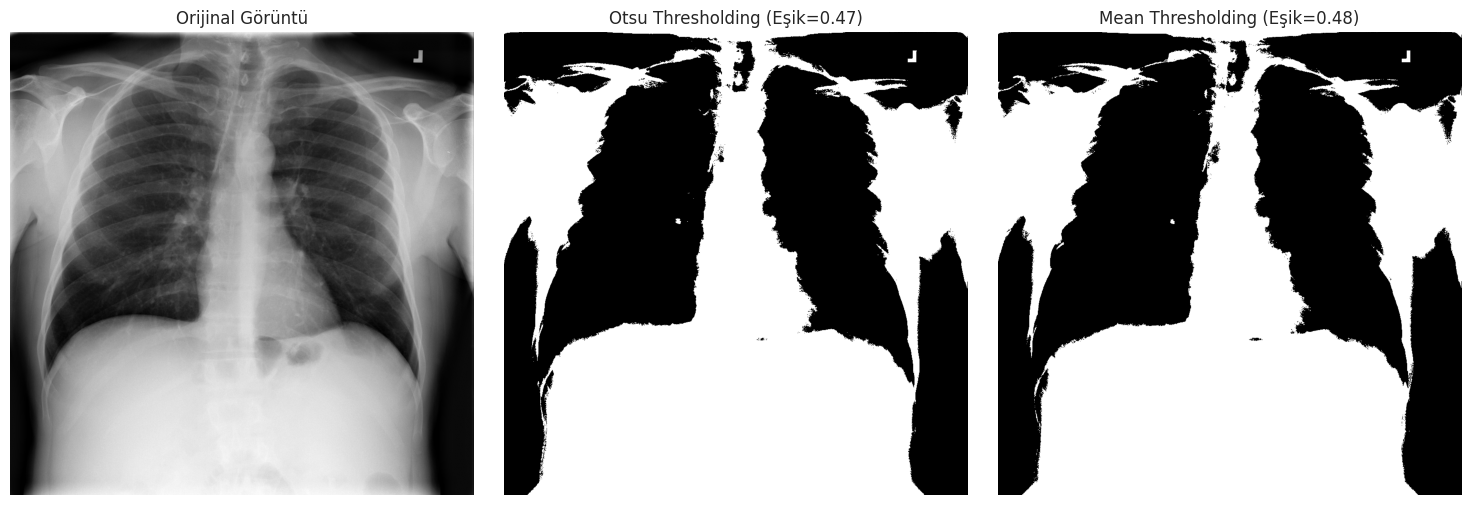

In [ ]:
# Otsu Thresholding uygula
otsu_threshold_value = threshold_otsu(img)
_, otsu_thresholded = cv2.threshold(img, otsu_threshold_value, 255, cv2.THRESH_BINARY)

# Mean Thresholding uygula
mean_threshold_value = threshold_mean(img)
_, mean_thresholded = cv2.threshold(img, mean_threshold_value, 255, cv2.THRESH_BINARY)

# Görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(otsu_thresholded, cmap='gray')
plt.title(f'Otsu Thresholding (Eşik={otsu_threshold_value:.2f})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mean_thresholded, cmap='gray')
plt.title(f'Mean Thresholding (Eşik={mean_threshold_value:.2f})')
plt.axis('off')

plt.tight_layout()
plt.show()

Yorum:
Global Thresholding: Manuel olarak belirlenen bir eşik değeri kullanır. Bu yöntem, görüntünün genel özelliklerine bağlı olarak iyi sonuçlar verebilir, ancak farklı görüntüler için uygun eşik değerini belirlemek zor olabilir.

Otsu Thresholding: Görüntünün histogramını analiz ederek otomatik olarak eşik değerini belirler. Bu yöntem, genellikle iyi sonuçlar verir ve farklı görüntüler için uyarlanabilir.

Mean Thresholding: Görüntünün ortalama değerini eşik değeri olarak kullanır. Bu yöntem basit olmasına rağmen, her zaman en iyi sonuçları vermeyebilir.

Sonuç: Otsu Thresholding, genellikle en iyi sonuçları verdiği için tercih edilebilir. Ancak, görüntünün özelliklerine bağlı olarak diğer yöntemler de denenebilir.

------------------------------------------------------------------------------------

5.Soru

Açma işlemi (Opening): cv2.MORPH_OPEN, görüntüdeki küçük gürültüleri kaldırmak için açma işlemi uygular. Bu işlem, önce bir erozyon, ardından bir genişletme işlemi uygular. Bu, görüntüdeki küçük beyaz bölgeleri (gürültüleri) siler.<br>

Kapama işlemi (Closing): cv2.MORPH_CLOSE, görüntüdeki küçük siyah bölgeleri (gürültüleri) doldurur. Bu işlem, önce bir genişletme, ardından bir erozyon uygular. Kapama işlemi, küçük delikleri beyazla doldurur.

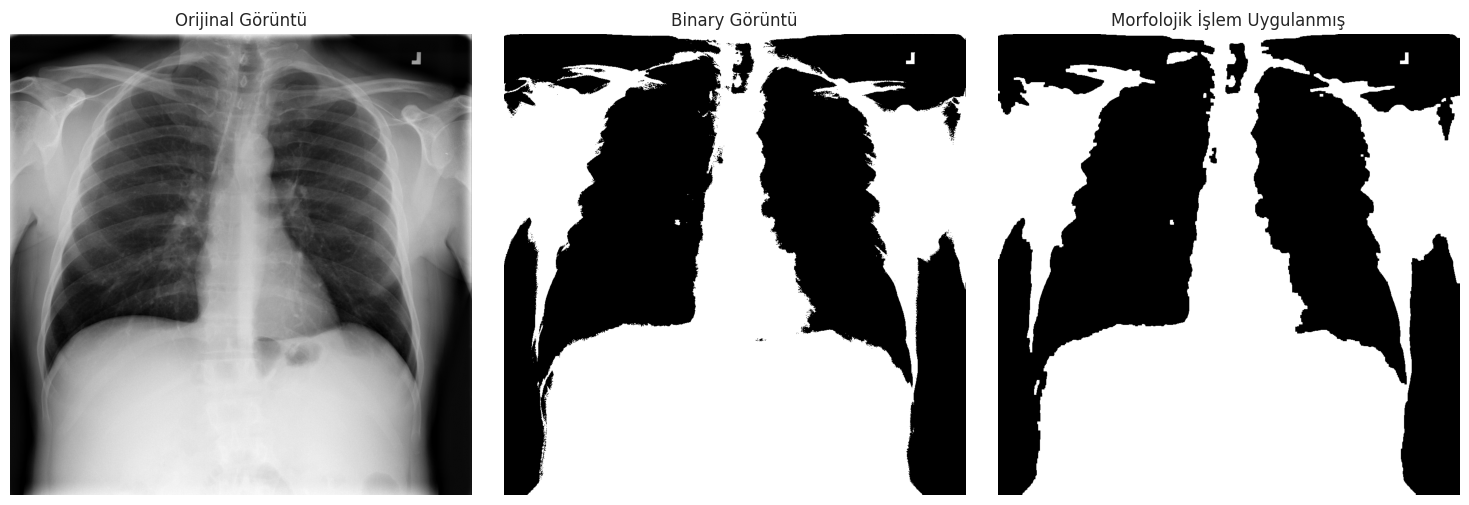

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Örnek görüntüyü yükle
img_dir = 'nih/images_small/'
sample_img = train_df['Image'].values[0]  # İlk görüntüyü örnek olarak al
img = plt.imread(os.path.join(img_dir, sample_img))

# Görüntüyü gri tonlamalı hale getir (eğer değilse)
if len(img.shape) > 2:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Görüntüyü 8-bit formatına dönüştür
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Binary thresholding uygula
_, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morfolojik operatörler uygula
kernel = np.ones((5, 5), np.uint8)  # 5x5 boyutunda yapısal eleman
morph_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)  # Açma işlemi
morph_img = cv2.morphologyEx(morph_img, cv2.MORPH_CLOSE, kernel)  # Kapama işlemi

# Giriş ve çıkış görüntülerini görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Görüntü')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(morph_img, cmap='gray')
plt.title('Morfolojik İşlem Uygulanmış')
plt.axis('off')

plt.tight_layout()
plt.show()

Aşağıdaki kodda bir görüntüdeki bağlantılı bileşenleri (nesneleri) tanımlamak ve saymak için bağlantı bileşen analizi (CCL) uygular. Morfolojik işlemlerden sonra, görüntüdeki bağımsız nesneler farklı etiketlerle tanımlanır ve bu nesnelerin sayısı hesaplanır. Son olarak, etiketlenen nesneler renkli bir şekilde görselleştirilir. Görselleştirilen görüntüde her bağımsız nesne, farklı bir renk ile gösterilir ve renk çubuğu hangi rengin hangi etiketi temsil ettiğini belirtir.

Toplam bölge sayısı: 13


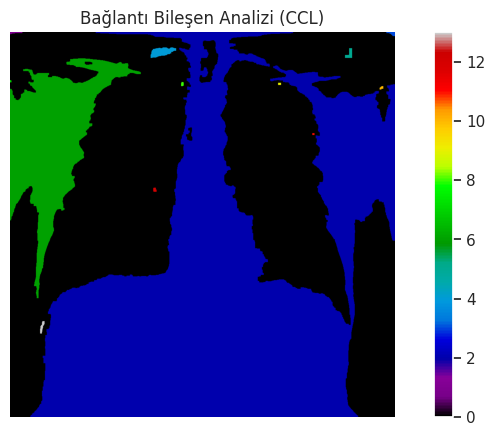

In [ ]:
from skimage import measure

# Bağlantı bileşen analizi uygula
labels = measure.label(morph_img)

# Bölge sayısını yazdır
num_labels = np.max(labels)
print(f"Toplam bölge sayısı: {num_labels}")

# CCL çıktısını görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(labels, cmap='nipy_spectral')
plt.title('Bağlantı Bileşen Analizi (CCL)')
plt.colorbar()
plt.axis('off')
plt.show()

Label (etiket): Nesnenin kimliğini belirler.<br>
Centroid: Nesnenin geometrik merkezi.<br>
Area: Nesnenin kapladığı alan (piksel sayısı).<br>
Mean Intensity: Nesnedeki ortalama yoğunluk (gri ton değeri).<br>
Eccentricity: Nesnenin daireden ne kadar sapma gösterdiğini ölçer.<br>
Perimeter: Nesnenin çevresinin uzunluğu.

In [ ]:
# Bölge özelliklerini hesapla
props = measure.regionprops(labels, img)

# Öznitelikleri yazdır
for prop in props:
    print(f"Label: {prop.label}")
    print(f"Centroid: {prop.centroid}")
    print(f"Area: {prop.area}")
    print(f"Mean Intensity: {prop.mean_intensity}")
    print(f"Eccentricity: {prop.eccentricity}")
    print(f"Perimeter: {prop.perimeter}")
    print("-" * 30)

Label: 1
Centroid: (1.462809917355372, 13.884297520661157)
Area: 121.0
Mean Intensity: 166.60330578512398
Eccentricity: 0.9928802937306118
Perimeter: 72.24264068711929
------------------------------
Label: 2
Centroid: (658.8828616099978, 570.4749358879756)
Area: 467541.0
Mean Intensity: 187.89901206525204
Eccentricity: 0.7490536958368044
Perimeter: 8361.825827469414
------------------------------
Label: 3
Centroid: (3.5838926174496644, 1015.2348993288591)
Area: 149.0
Mean Intensity: 173.85906040268458
Eccentricity: 0.919560291260226
Perimeter: 59.31370849898476
------------------------------
Label: 4
Centroid: (52.616761594792514, 403.31570382424735)
Area: 1229.0
Mean Intensity: 135.35150528885274
Eccentricity: 0.9453969151327636
Perimeter: 175.49747468305833
------------------------------
Label: 5
Centroid: (58.18181818181818, 902.6700336700337)
Area: 297.0
Mean Intensity: 153.2828282828283
Eccentricity: 0.8560014630683346
Perimeter: 84.82842712474618
------------------------------
La

Aşağıdaki kodda bağlantı bileşen analizi ile elde edilen bölgelerden en büyük iki bölgeyi seçer ve yalnızca bu iki bölgeyi gösteren bir görüntü oluşturur. Görüntüdeki renkli bölgeler, en büyük iki nesneyi (bölgeyi) temsil eder. Bu işlem, nesnelerin büyüklüklerine göre ayrım yaparak yalnızca belirli nesnelerin analize alınmasını sağlar.

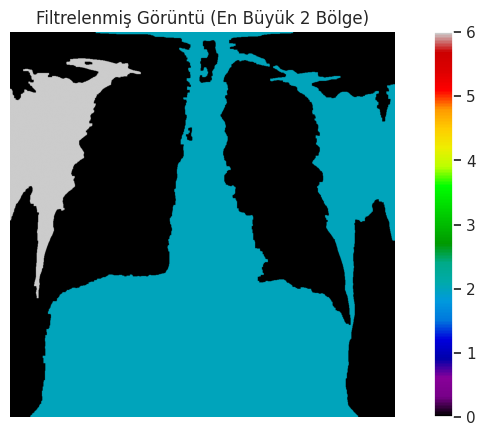

In [ ]:
# En büyük iki bölgeyi bul
areas = [prop.area for prop in props]
sorted_indices = np.argsort(areas)[::-1]  # Alanlara göre sırala

# En büyük iki bölgeyi filtrele
filtered_labels = np.zeros_like(labels)
for i in sorted_indices[:2]:
    filtered_labels[labels == props[i].label] = props[i].label

# Filtrelenmiş görüntüyü görselleştirme
plt.figure(figsize=(10, 5))
plt.imshow(filtered_labels, cmap='nipy_spectral')
plt.title('Filtrelenmiş Görüntü (En Büyük 2 Bölge)')
plt.colorbar()
plt.axis('off')
plt.show()

Aşağıdkai kodda en büyük iki bölgeyi filtreledikten sonra morfolojik işlemler (açma ve kapama) uygulanır. Açma işlemi küçük nesneleri ve gürültüyü ortadan kaldırırken, kapama işlemi küçük boşlukları doldurur. Son olarak, bu iki görüntü (filtrelenmiş ve morfolojik işlem uygulanmış) yan yana görselleştirilir, böylece morfolojik işlemin etkisi açıkça görülebilir.

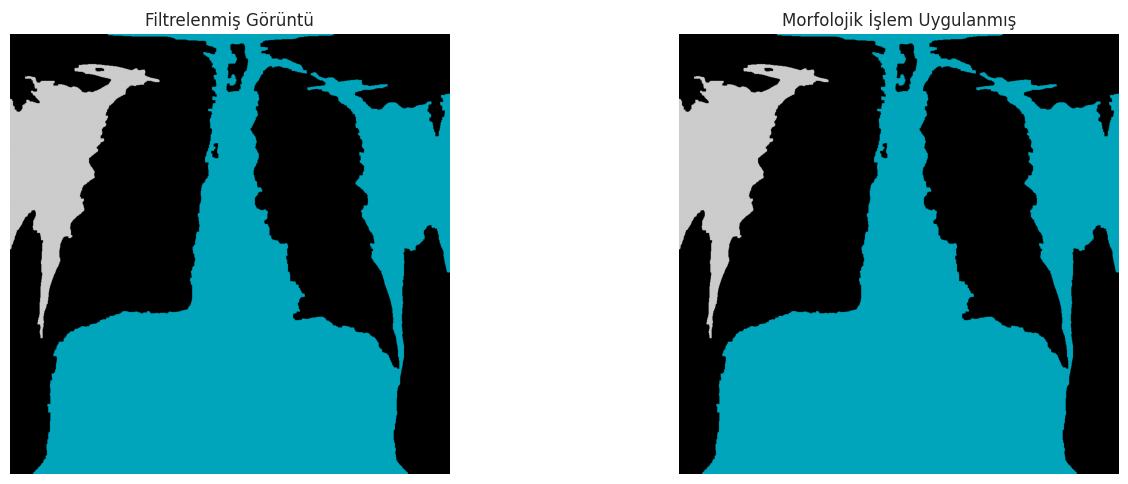

In [ ]:
# Filtrelenmiş görüntüye morfolojik işlemler uygula
kernel = np.ones((3, 3), np.uint8)  # 3x3 boyutunda yapısal eleman
final_img = cv2.morphologyEx(filtered_labels.astype(np.uint8), cv2.MORPH_OPEN, kernel)
final_img = cv2.morphologyEx(final_img, cv2.MORPH_CLOSE, kernel)

# Giriş ve çıkış görüntülerini görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(filtered_labels, cmap='nipy_spectral')
plt.title('Filtrelenmiş Görüntü')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_img, cmap='nipy_spectral')
plt.title('Morfolojik İşlem Uygulanmış')
plt.axis('off')

plt.tight_layout()
plt.show()

6.Soru

Yorum:
Morfolojik Operatörler: Gürültüyü azaltmak ve bölgeleri daha net hale getirmek için açma ve kapama işlemleri uygulandı.

Bağlantı Bileşen Analizi: Görüntüdeki bağlantılı bölgeler etiketlendi ve bölge sayısı belirlendi.

Öznitelikler: Her bölgenin centroid, alan, ortalama yoğunluk, eksantriklik ve çevre gibi özellikleri hesaplandı.

Filtreleme: En büyük iki bölge seçilerek akciğer alanları belirlendi.

Son Morfolojik İşlemler: Filtrelenmiş görüntüye ek morfolojik işlemler uygulandı.

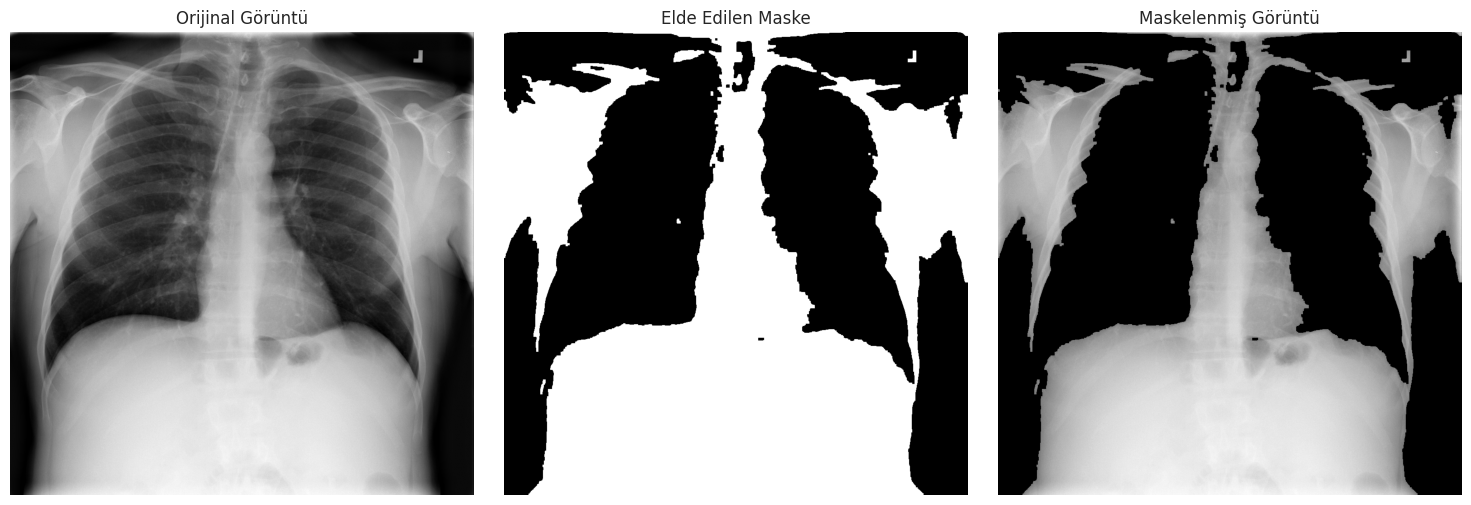

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

# Örnek görüntüyü yükle
img_dir = 'nih/images_small/'
sample_img = train_df['Image'].values[0]  # İlk görüntüyü örnek olarak al
img = plt.imread(os.path.join(img_dir, sample_img))

# Görüntüyü gri tonlamalı hale getir (eğer değilse)
if len(img.shape) > 2:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Görüntüyü 8-bit unsigned integer türüne dönüştür
img = (img * 255).astype(np.uint8)

# Binary thresholding uygula
_, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morfolojik operatörler uygula
kernel = np.ones((5, 5), np.uint8)  # 5x5 boyutunda yapısal eleman
morph_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)  # Açma işlemi
morph_img = cv2.morphologyEx(morph_img, cv2.MORPH_CLOSE, kernel)  # Kapama işlemi

# Maskeyi orijinal görüntüyle çarp
masked_img = cv2.bitwise_and(img, img, mask=morph_img)

# Görselleştirme
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(morph_img, cmap='gray')
plt.title('Elde Edilen Maske')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(masked_img, cmap='gray')
plt.title('Maskelenmiş Görüntü')
plt.axis('off')

plt.tight_layout()
plt.show()

Yorumlama
Orijinal Görüntü: Görüntünün ham hali, herhangi bir işlem uygulanmamış halidir. Bu görüntüde, akciğer bölgeleri ve diğer anatomik yapılar görülebilir.

Elde Edilen Maske: Binary thresholding ve morfolojik işlemler sonucunda elde edilen maske, akciğer bölgelerini vurgular. Bu maske, ilgilenilen bölgeleri (örneğin akciğer alanlarını) beyaz (255), diğer bölgeleri ise siyah (0) olarak gösterir.

Maskelenmiş Görüntü: Maskeyi orijinal görüntüyle çarptığımızda, sadece ilgilenilen bölgeler (akciğer alanları) görüntüde kalır. Diğer bölgeler siyah olarak gösterilir. Bu, akciğer bölgelerinin net bir şekilde vurgulanmasını sağlar.

Sonuçların Analizi
Akciğer Bölgelerinin Vurgulanması: Maskelenmiş görüntü, akciğer bölgelerini net bir şekilde gösterir. Bu, özellikle tıbbi görüntü analizinde, ilgilenilen bölgelerin izole edilmesi açısından önemlidir.

Gürültünün Azaltılması: Morfolojik işlemler (açma ve kapama), maskede istenmeyen gürültüleri azaltır ve akciğer bölgelerini daha net hale getirir.

Otomatik Segmentasyon: Otsu thresholding gibi otomatik eşik belirleme yöntemleri, görüntüdeki bölgeleri otomatik olarak ayırmak için kullanışlıdır.